<a href="https://colab.research.google.com/github/aarsh2211/SudokuSolver/blob/master/sudokuSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np

In [0]:
def preprocessimage(img):
  processed = cv2.GaussianBlur(img,(9,9),0)
  processed = cv2.adaptiveThreshold(processed,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  processed = cv2.bitwise_not(processed)
  kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]])
  #processed = cv2.dilate(processed,kernel)
  return processed
  

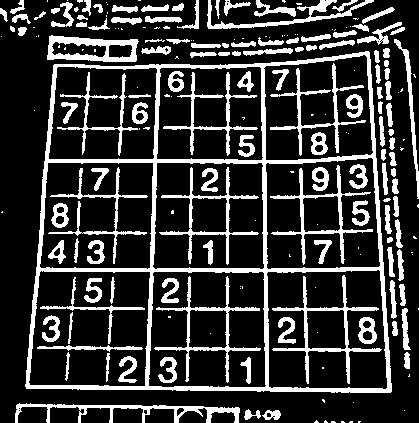

In [40]:
from google.colab.patches import cv2_imshow
img = cv2.imread('sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
processed_image = preprocessimage(img)
cv2_imshow(processed_image)
#ab apan log contour nikalenge

_, external_contours,_ = cv2.findContours(processed_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
_, contours,_ = cv2.findContours(processed_image.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

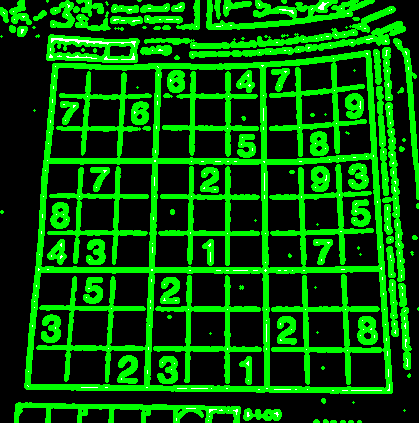

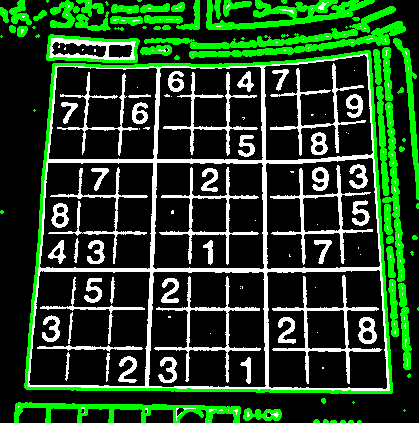

In [41]:
processed_image = cv2.cvtColor(processed_image, cv2.COLOR_GRAY2RGB)
allcontours  = cv2.drawContours(processed_image.copy(),contours,-1,(0,255,0), 2)
extcontours  = cv2.drawContours(processed_image.copy(),external_contours,-1,(0,255,0), 2)
cv2_imshow(allcontours)
cv2_imshow(extcontours)

In [0]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)  #sot maro
polygon = contours[0] #mil hi gaya akhir


In [0]:
import operator
tl,_ = min(enumerate([pt[0][0]+pt[0][1] for pt in polygon]), key = operator.itemgetter(1))
tr,_ = max(enumerate([pt[0][0]-pt[0][1] for pt in polygon]), key = operator.itemgetter(1))
bl,_ = min(enumerate([pt[0][0]-pt[0][1] for pt in polygon]), key = operator.itemgetter(1))
br,_ = max(enumerate([pt[0][0]+pt[0][1] for pt in polygon]), key = operator.itemgetter(1))


[array([54, 64], dtype=int32), array([369,  52], dtype=int32), array([390, 392], dtype=int32), array([ 26, 388], dtype=int32)]


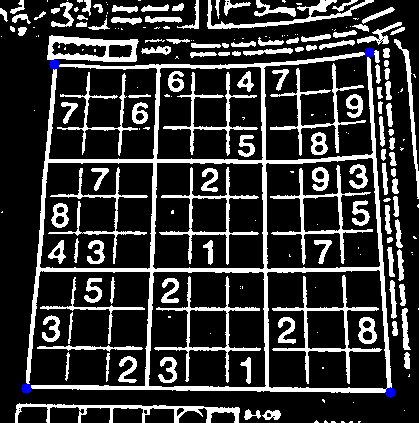

In [61]:
corners = [polygon[tl][0],polygon[tr][0],polygon[br][0],polygon[bl][0]]
print(corners)
the_image = processed_image.copy()
for i in range(4):
    
    cv2.circle(the_image,(corners[i][0],corners[i][1]),5,(255,0,0),-1)
cv2_imshow(the_image)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sudoku.jpeg to sudoku.jpeg
